In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

Problem Statement:

The dataset is about past and current employees in a spreadsheet on the  desk top. It has various data points on the employees, but we are interested in whether they’re still with the company or whether they’ve gone to work somewhere else. And we want to understand how this relates to workforce attrition.

Goal of the case study:

You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


Outline:

1) Import Datasets
2) Missing Value's Imputation
3) Exploratory Data Analysis
4) Feature Engineering
5) Model Building
6) Model Evaluation

In [3]:
df=pd.read_csv("C:\\Users\\Faisal Hassan\\Downloads\\archive (11)\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


 2) Missing Value's Imputation

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
ac=pd.DataFrame(df['Attrition'].value_counts())
ac

,Attrition
No,1233
Yes,237


([<matplotlib.patches.Wedge at 0x1fd42b7af10>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')])

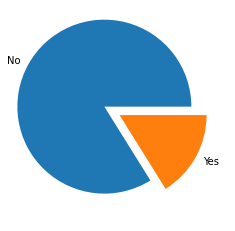

In [7]:
plt.pie(ac['Attrition'],labels=['No','Yes'],explode=(0.2,0))

C:\Users\Faisal Hassan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

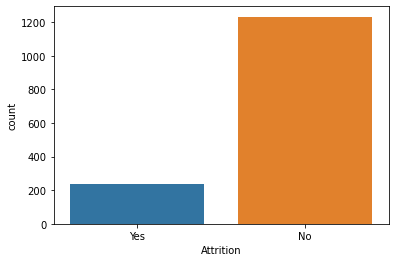

In [8]:
sns.countplot(df['Attrition'])

In [9]:
df.drop(['EmployeeCount','EmployeeNumber'],axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [10]:
ad=pd.get_dummies(df['Attrition'])
ad.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [11]:
df=pd.concat([df,ad],axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,1,0


In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'No', 'Yes'],
      dtype='object')

In [13]:
df.drop([ 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager','No','Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TrainingTimesLastYear', 'WorkLifeBalance','Attrition','BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber', 'HourlyRate','JobLevel','JobSatisfaction','MonthlyRate'],axis =1,inplace=True)


In [14]:
df.head()

,Age,Department,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,Yes
0,41,Sales,2,Female,3,Sales Executive,Single,5993,8,8,6,1
1,49,Research & Development,3,Male,2,Research Scientist,Married,5130,1,10,10,0
2,37,Research & Development,4,Male,2,Laboratory Technician,Single,2090,6,7,0,1
3,33,Research & Development,4,Female,3,Research Scientist,Married,2909,1,8,8,0
4,27,Research & Development,1,Male,3,Laboratory Technician,Married,3468,9,6,2,0


In [15]:
df.shape

(1470, 12)

<AxesSubplot:xlabel='Gender', ylabel='Yes'>

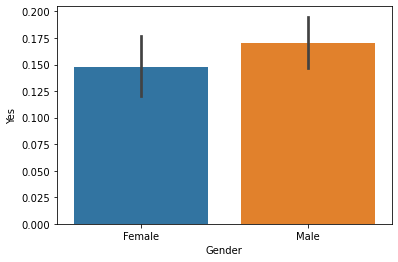

In [16]:
sns.barplot(x='Gender',y='Yes',data=df)

<AxesSubplot:xlabel='Department', ylabel='Yes'>

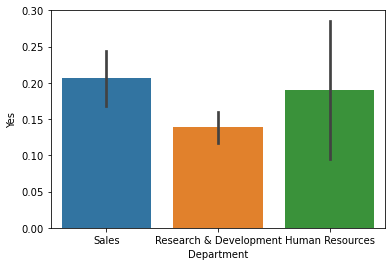

In [17]:
sns.barplot(x='Department',y='Yes',data=df)

<AxesSubplot:>

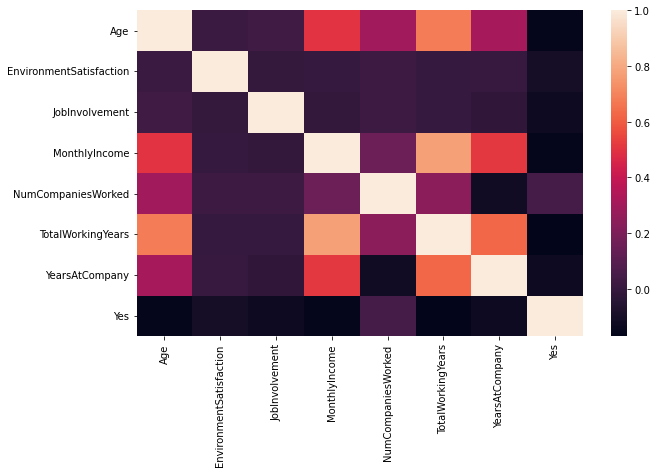

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),color='black')

 Encoding:  
Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called [feature encoding](https://medium.com/analytics-vidhya/different-type-of-feature-engineering-encoding-techniques-for-categorical-variable-encoding-214363a016fb).



Find out all the categorical columns and encode them. As Machine Learning model's cannot understand text Data Types.

 Hot Encodig:(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
All the categorical variables are Nominal in nature, which means the values are independent of each other and do not follow any order. we will perform 1-Hot encoding using pandas[.get_dummies]((https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)). 

In [19]:
# Store the column names in one_hot_var list. 1-hot encoding of these features will be done
one_hot_var = ['Department','Gender','MaritalStatus','JobRole']

# perform 1-hot encoding on each column present in one_hot_var
for i in one_hot_var:
    # perform 1-hot encoding for variable & store it in x_t dataframe
    x_t = pd.get_dummies(df[i], prefix=i, prefix_sep='_', drop_first=True) # define new column name, separator and drop 1 of them.
    
    # join x_t to df
    df = df.join(x_t)
    
    # drop original column from df as it is no longer needed
    df.drop(i, axis = 1, inplace = True)

In [20]:
#from sklearn.preprocessing import LabelEncoder
#for column in df.columns:
  #  if df[column].dtype==np.number:
  #      continue
  #  else:
  #      df[column]=LabelEncoder().fit_transform(df[column])

 Split Features and Target:

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=df.drop(['Yes'],axis=1)
y=df['Yes']

 Split Training and Testing Data using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [24]:
x_train.head()

,Age,EnvironmentSatisfaction,JobInvolvement,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,Department_Research & Development,Department_Sales,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
944,28,3,1,6674,0,10,9,1,0,0,1,0,0,1,0,0,0,0,0,0
1402,31,4,1,1129,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
1054,49,3,3,10466,3,29,8,1,0,1,0,0,0,0,0,0,0,0,0,0
1128,36,1,4,5562,3,9,3,1,0,1,1,0,0,1,0,0,0,0,0,0
1323,28,3,3,2706,1,3,3,0,0,1,0,0,1,0,0,0,0,0,0,0


In [25]:
x_train['TotalWorkingYears'].max()

40

 Model Building 

In [26]:
## random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [27]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [28]:
rf.score(x_train,y_train)

0.9782214156079855

In [29]:
pred1=rf.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,pred1)

0.845108695652174

### Hyper-parameter Tuning using  [ RandomizedSearchCV]

In [32]:
model=RandomForestClassifier(n_estimators=200,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(accuracy_score(y_test,predictions))

0.8505434782608695


In [33]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x)for x in np.linspace(start=200,stop=2000,num=10)]

max_features=['auto','sqrt','log2']

max_depth=[int(x)for x in np.linspace(10,1000,10)]

min_samples_split=[1,3,4,5,7,9]

min_samples_leaf=[1,2,4,6,8]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'criterion':['entropy','gini']}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [1, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [34]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\Faisal Hassan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
51 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
51 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Faisal Hassan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Faisal Hassan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\Faisal Hassan\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Fai

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [41]:
rf_randomcv.best_params_

{'n_estimators': 800,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560,
 'criterion': 'gini'}

In [42]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=560, max_features='log2', min_samples_split=4,
                       n_estimators=800)

In [43]:
best_random_grid=rf_randomcv.best_estimator_

In [44]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)


In [45]:
print('accuracy score{}'.format(accuracy_score(y_test,y_pred)))

accuracy score0.8478260869565217


In [46]:
import pickle
pickle_out = open("employee1.pkl","wb")
pickle.dump(rf_randomcv, pickle_out)
pickle_out.close()